## Data Modelling using Neural Networks (class 6)

## Introduction to Regression (least-square methods, loss functions)

Dictionary:
* confuse - confundir
* fitting - ajuste
* collapse - desplomar (colapsar?)
* obtain - obtener
* adjust - ajustar
* shadow - sombra
* loss - perdida
* least - minimo
* residuals - residuos
least squares - los cuadrados minimos

## Clarifying last points
* https://deeplearningjourney.com/2020/12/13/3-ways-to-build-neural-networks-in-tensorflow-with-the-keras-api/
* default activation function is linear
* NN is for more complex problems. Fit or regression is good for simpler problems.
There is no need to build a NN for the data below
<img src="imgs/linear_regression_data.png" width="400" /> 

<img src="imgs/confuse_ml.png" width="500" /> 

## Regression
Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.

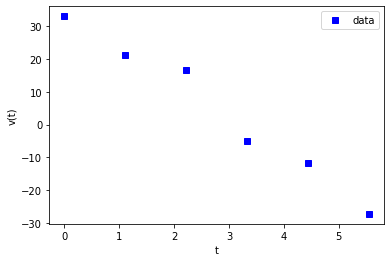

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t=np.array([0,1.11, 2.22,3.33, 4.44, 5.55])
v=np.array([ 33.10, 21.33, 16.57,-5.04, -11.74, -27.32])
fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

* Given a data set, the first approach to find a function that passes through the points would be using a
interpolation polynomial. 
* But we should take special attention to the way data set is gathered, i.e., usually is a sample obtained experimentally or in a way that has associated an intrinsic error. 
* Then, forcing that the approximate function passes through all the points would actually incur in incrementing the error. This is why it is necessary to build a different procedure to build the function that fits the data.

* better approach is to use fitting functions,
* But the fitting function is not going to take the exact value in the known points, they are going to desagree in certain tolerance value. 

* This type of procedure is also used to approximate functions to a simper type of function. Although the procedure
is very similar is not going to be include because of the lack of use of it that commonly has.  

### What is fitting good for:

* can be used to predict the values where there are no data points (similar to interpolation)
* we can obtain analytical approximation of the data points, which coefficients correspond to physical cuantities!

## Approximating data using interpolation

Lets look at a data set

data: $y_i(x_i)$

* $y_i$ are the data points

A body is moving under the influence of an external force, the variation of the position measured for different 
times are compiled in table 1. 

| t(s) |  | v(m/s)         
| :------: |:-------------: | :-------:|
|0| 2.76 | 33.10
| 1.11| 29.66 | 21.33
| 2.22|46.83 | 16.57
|3.33 | 44.08 |-5.04
| 4.44| 37.26| -11.74
| 5.55| 12.03| -27.32| 




the problem is that the values $y_i$ are not precise so interpolating the points inbetween wouldn't make much sense. Lets see why:

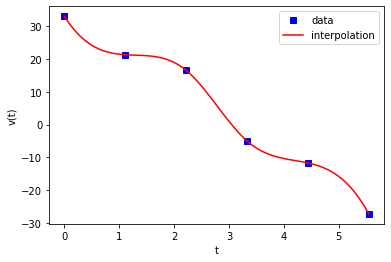

In [11]:
from scipy import interpolate
import numpy as np

v_interp = interpolate.interp1d(t,v,kind='cubic')  #Using cubic splines.
t_mesh=np.linspace(np.min(t),np.max(t),100)

fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.plot(t_mesh,v_interp(t_mesh),'-r', label='interpolation')

ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

can we having the interpolated points predict the value of $v$ for unknown data point $t$, for example $t=1.5$? Rather not!

## Approximating data using least squares method (linear regression, fitting)

lets visualize the problem: https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html

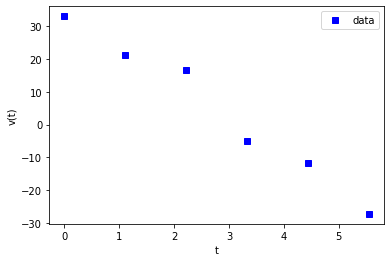

In [12]:
import numpy as np
import matplotlib.pyplot as plt
t=np.array([0,1.11, 2.22,3.33, 4.44, 5.55])
v=np.array([ 33.10, 21.33, 16.57,-5.04, -11.74, -27.32])
fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

Then it is proposed to find the best approximating line despite of the fact it does not coincide with the data at any point using a function

* we have to guess a function to which we want to approximate the points!!!
* to do the fitting we have to understand what process we are dealing with
* for the case of the data above the function can be: $f(x_i) = a_1x_i + a_0$
* but there is infinite number of curves that can go through those points!
* which one is the best?

The best linear approximation in the absolute sense requires that the values of $a_0$ and $a_1$ would be found to minimize 

if

* $y_i$ are the points
* $m$ is the number of points
* $f(x_i)$ is the searched function that minimizes $E$ (makes the residuals as small as possible - perfectly zero, but this is usually not possible)

$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - f(x_i)]^2 
$$

$f(x_i)$ is called hypothesis function ($\theta(x)$)

$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$
where:

$$S_i=y_i - (a_1 x_i + a_0)$$
are residuals

$$
E = \sum_{i=1}^{m}[S_i]^2 
$$

* the objective is to make the sum of the squares of the residuals to make as small as possible

* why is it called ***least squares method***?
https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html

### MeanSquaredError / loss function (Regression problem)

$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$


So to make the $E$ (error) as small as possible means to make the sum of the squares (areas of each residual) as small as possible 

We can alos divide the sum by number of points considered 

$$
E = \frac{1}{m} \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$

$$
MSE = \frac{1}{m} \sum_{i=1}^{m}[y_i - f_i]^2 
$$

is called loss function or more commonly Mean Squared Error (MSE)

(used everywhere, also in Neural Networks: https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)

MSE is high for large loss values and decreases as loss approaches 0. For example, if we will have a distance of 3 the MSE will be 9, and if we will have a distance of 0.5 the MSE will be 0.25 so the loss is much lower.

### Other most common loss functions:

$$
MAE = \frac{1}{m} \sum_{i=1}^{m}|y_i - f_i| 
$$

Since we are taking the absolute value, all of the errors will be weighted on the same linear scale. Thus, unlike the MSE, we won’t be putting too much weight on our outliers and our loss function provides a generic and even measure of how well our model is performing.

 ( Mean absolute error) — here all errors, big and small, are treated equally

$$
MAPE = \frac{100}{m} \sum_{i=1}^{m} \left|\frac{y_i - f_i}{y_i}\right|
$$

Actual Value ($y_i$) and the Estimated/Forecast value ($f_i$). 

Also known as mean absolute percentage deviation (MAPD), it measures the size of the error in percentage terms.

MAPE ( Mean Absolute Percentage Error) — Since #1 and #2 depending on the value range of the target variable, they cannot be compared across datasets. In contrast, MAPE is a percentage, hence relative. It is like accuracy in a classification problem, where everyone knows 99% accuracy is pretty good.

$$
RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m}[y_i - f_i]^2 }
$$

Root Mean Square Error (RMSE) — this penalizes large errors due to the squared term. For example, with errors [0.5, 0.5] and [0.1, 0.9], MSE for both will be 0.5 while RMSE is 0.5 and. 0.45.

# Classification problem: there are different loss functions
* Binary Cross Entropy (It is used to calculate the loss of classification model where the target variable is binary like 0 and 1.)
* Categorical Crossentropy (It is used for the classification models where the target classes are more than two. It is a generalization of binary cross-entropy) (when target classes are 1000,0100,0010,0001)
* Sparse Categorical Crossentropy (when the target classes are 0,1,2,3,4...)

... to calculate them we use logarithmic function (comes from the definition of entropy and theory of information) we will talk about them later

### Finding the coefficients analytically:

To analytically minimize the function of 2 variables 

$$
E = \frac{1}{m} \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$

it is necessary to set its partial derivatives to zero and simultaneously solve to the resulting equations. But the best procedure for determining best linear approximations is to minimize the sum of the square of the diffences between the y values on the approximating line and the given y values.

This is, minimize the next expression with respect to $a_0$ and $a_1$
i.e., a minimum to occur. Then, it is needed to take the partial derivatives with respect to $a_0$  and $a_1$ and equating them to zero.


$$
\frac{\partial E}{\partial a_0} = 0 \hspace{1cm} 
\frac{\partial E}{\partial a_1} = 0 
$$

* its like a system of equations requied to find two unknowns - here $a_0$ and $a_1$

Afterwards, 

$$
0= 2\sum_{i=1}^{m}(y_i -a_1x_i-a_0)(-1) \hspace{1.5cm} 
0 = 2\sum_{i=1}^{m}(y_i -a_1x_i-a_0)(-x_i) \\
a_0 m + a_1\sum_{i=1}^{m}x_i = \sum_{i=1}^{m} y_i \hspace{1.5cm} a_0\sum_{i=1}^{m}x_i  + a_1\sum_{i=1}^{m}x_i^2 = \sum_{i=1}^{m} x_iy_i 
$$

where the coefficients $a_0$ and $a_1$ can be easily obtained

$$
a_0 = \frac{\sum_{i=1}^{m} x_i^2\sum_{i=1}^{m}y_i - \sum_{i=1}^{m} x_iy_i \sum_{i=1}^{m} x_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2} \hspace{1.5cm}
a_1 = \frac{m\sum_{i=1}^{m} x_iy_i^2 - \sum_{i=1}^{m} x_i \sum_{i=1}^{m} y_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2} 
$$

Now, using the error definition one can find the error associated to the approximation made,

since the coefficients $a_0$ and $a_1$ are already known.

## How does the computer minimize the residuals?

But this is not how the functions are fitted to the points. Why?
Because when the target function is more complex (4-space and higher 4 dimensions, or for complex systems) it may be incredibly difficult to solve an equation for zero!. Hence we should design a specific algorithm to teach computer that you can get the (global minima) optimal solution in this way. Approximation by using gradient descent may be much faster than trying to solve the problem by hand or using a computer..

## Fitting using Python
scipy.optimize.curve_fit
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

scipy.optimize.curve_fit(func, xdata, ydata, p0=None, method='method')

parameters to pass to the function:

* func - our guess function
* xdata is $x_i$
* ydata is $y_i$
* p0 - initial guess (here initial guess of $a_0$ & $a_1$)
* method: 'lm’, ‘trf’, ‘dogbox’
  ('lm'=Levenberg-Marquardt)

In [4]:
def func(x, a1, a0):
    return a1 * x + a0

#Time
t = np.array([ 0.,  1.11,  2.22,  3.33,  4.44, 5.55])
#Velocities measured for every time t[i]
v = np.array([33.10, 21.33, 16.57, -5.04, -11.74, -27.32])
xdata=t
ydata=v

p0=np.array([1.0,1.0])

In [14]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata, p0, method='lm')
perr = np.sqrt(np.diag(pcov))
print('a1= ',popt[0])
print('a0= ',popt[1])
print(perr)

a1=  -10.885971685971686
a0=  34.691904761904766
[0.82703577 2.77941242]


according to documentation, 
* popt: optimal values for the parameters so that the sum of the squared residuals of $f(xdata, *popt) - ydata$ is minimized.

* pcov: the estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use $perr = np.sqrt(np.diag(pcov)).$

In [15]:
t_mesh=np.linspace(np.min(t),np.max(t),100)
v_fit=popt[0]*t_mesh + popt[1]

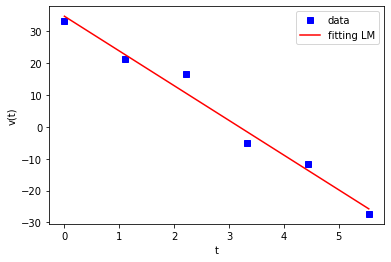

In [16]:
fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.plot(t_mesh,v_fit,'-r', label='fitting LM')

ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

In [8]:
import numpy as np

def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean()